In [1]:
#여기서부터 시작

In [2]:
pip install konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 460kB 27.8MB/s 
     |████████████████████████████████| 92kB 8.1MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [3]:
#한글 사용
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
dataset = pd.read_csv('result.csv',encoding='cp949')

In [5]:
X  = dataset['comment_text']
y  = dataset['label']

In [76]:
from sklearn.model_selection import train_test_split

# train_test_split
train_data , test_data = train_test_split(dataset, test_size=0.2, random_state=42)

In [77]:
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력

훈련용 리뷰 개수 : 480


In [78]:
train_data['comment_text'].nunique(), train_data['label'].nunique()

(459, 3)

In [79]:
train_data['comment_text'] = train_data['comment_text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
train_data[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,view,like,unlike,comment,date,comment_text,뷰티,게임,운동,label
145,[eng]60만원짜리 고데기 다이슨 에어랩을 써보았다 Dyson Airwrap Ho...,764193,5300,426,307,2018.10.27,가격자체가 넘나 큰 단점 마지막에 여러분의 돈이 여러분이 온전히 원하는 걸 얻은 데...,0,0,1,2
9,UNBOXING: Off-White c/o Amorepacific Kit,91632,3400,233,175,2021.2.10,단순노출 선물협찬 광고의 신세계 뒷광고 뒷광고 뒷광고 뒷광고 뒷광고 뒷광고 뒷광고 ...,1,0,0,0
375,지가 죽여놓고 못 본 척하는 졸린 임포스터() 우주마피아게임 어몽어스,2917416,28000,831,2045,2020.8.12,우주하마 는 저렇게 친구 없이 혼자 게임하는게 좋아 아무튼이야 개웃긴닼하양이 보고 ...,0,1,0,1
523,찾는데만 기본 몇년은 걸린 어떻게 찾았는지 궁금한 이스터에그 TOP6,1939727,좋아요,싫어요,987,2018.9.14,내생에 족구랑 도선생님이랑 같이 있는 화면을 볼줄이야 꿀탱탱 입장에서도 억울하지 상...,0,1,0,1
188,드디어 룸투어 랜선집들이 초대할게요ROSEHA ROOM TOUR,945417,22000,530,1320,2019.1.6,아 진짜 공주가 사는곳같다 나도 빨리 커서 자취할때 집 예쁘게 꾸밀 생각 밖에 안들...,1,0,0,0


In [80]:
train_data['comment_text'] = train_data['comment_text'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['comment_text'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

title            0
view             0
like             0
unlike           0
comment          0
date             0
comment_text    12
뷰티               0
게임               0
운동               0
label            0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [81]:
train_data.loc[train_data.comment_text.isnull()][:5]

,title,view,like,unlike,comment,date,comment_text,뷰티,게임,운동,label
220,말린장미맛zip mlbb 립스틱 틴트 추천 + 바르는법 * LIPSTICK TUTO...,12231701,31000,5900,4813,2019.7.27,NaN,1,0,0,0
222,레드맛zip 레드 립스틱 틴트 추천 + 바르는법 * LIPSTICK TUTORIAL...,4086398,88000,2400,1592,2019.5.17,NaN,1,0,0,0
225,{솜털주의} 롬앤봄신상zip 틴트 예쁘게 바르는 법 / 틴트 추천 *lip mak...,2212336,68000,1200,2454,2020.3.17,NaN,1,0,0,0
50,이 여자 인생 바꿔놓겠습니다 Ep1다이어트기초 (현미날다) I'm Gonna Cha...,3370786,6000,875,2631,2020.5.30,NaN,0,0,1,2
346,e33 섹시 청바지 뒷태 타바타 | Sexy apple peach hip 2,4683362,10000,1600,1048,2019.4.15,NaN,0,0,1,2


In [82]:
#위에 처럼 Null 값을 가지는 것 삭제
train_data = train_data.dropna(how = 'any')
print(len(train_data))

468


In [83]:
test_data.drop_duplicates(subset = ['comment_text'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['comment_text'] = test_data['comment_text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['comment_text'] = test_data['comment_text'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['comment_text'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 112


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [84]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게','로','님','안','저','만','요','에서','거','것','떄','안','아','더','하는','때','분','하고','못','제','또','까지','그','기','수','개','서','내','제','입니다','면','이다','나','합니다','해']

In [85]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem = True)

['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [86]:
#각 카테고리별 단어 빈도, 통계확인

In [87]:
train_data['tokenized'] = train_data['comment_text'].apply(okt.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [88]:
beauty = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
game = np.hstack(train_data[train_data.label == 1]['tokenized'].values)
sport = np.hstack(train_data[train_data.label == 2]['tokenized'].values)

In [89]:
from collections import Counter

In [90]:
beauty_word_count = Counter(beauty)
print(beauty_word_count.most_common(20))

[('진짜', 145), ('언니', 132), ('영상', 131), ('완료', 113), ('너무', 98), ('메이크업', 59), ('화장', 55), ('많이', 51), ('얼굴', 50), ('사람', 50), ('정말', 43), ('피부', 42), ('같아요', 39), ('광고', 35), ('말', 35), ('보고', 35), ('눈', 35), ('할', 34), ('오늘', 32), ('사랑', 31)]


In [91]:
game_word_count = Counter(game)
print(game_word_count.most_common(20))

[('진짜', 77), ('영상', 54), ('너무', 44), ('사람', 42), ('게임', 41), ('왜', 30), ('말', 28), ('명', 27), ('적', 27), ('생각', 26), ('핵', 24), ('욕', 22), ('공격', 22), ('형', 21), ('여기', 20), ('할', 20), ('방송', 20), ('중', 20), ('해서', 19), ('시간', 19)]


In [92]:
sport_word_count = Counter(sport)
print(sport_word_count.most_common(20))

[('운동', 216), ('일차', 206), ('진짜', 139), ('영상', 132), ('너무', 112), ('일', 67), ('많이', 65), ('오늘', 64), ('몸', 62), ('할', 61), ('정말', 52), ('사람', 51), ('적', 48), ('감사합니다', 48), ('생각', 48), ('월', 47), ('자세', 47), ('선수', 42), ('스트레칭', 42), ('인데', 40)]


뷰티 영상 댓글의 평균 길이 : 79.88513513513513
게임 영상 댓글의 평균 길이 : 50.962025316455694
운동 영상 댓글의 평균 길이 : 92.30864197530865


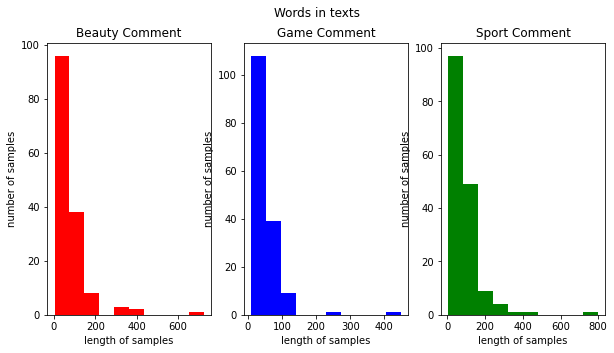

In [93]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Beauty Comment')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('뷰티 영상 댓글의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Game Comment')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('게임 영상 댓글의 평균 길이 :', np.mean(text_len))


text_len = train_data[train_data['label']==2]['tokenized'].map(lambda x: len(x))
ax3.hist(text_len, color='green')
ax3.set_title('Sport Comment')
fig.suptitle('Words in texts')
ax3.set_xlabel('length of samples')
ax3.set_ylabel('number of samples')
print('운동 영상 댓글의 평균 길이 :', np.mean(text_len))


plt.show()

In [ ]:
#토큰화하기 

In [94]:
X_train = []
for sentence in train_data['comment_text']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [95]:
print(X_train[:3])

[['가격', '자체', '넘다', '크다', '단점', '마지막', '여러분', '돈', '여러분', '오다', '원하다', '걸', '얻다', '데', '쓰이다', '바라다', '말', '넘다', '좋다', '다이슨', '청소기', '쓰다', '있다', '다이슨', '품질', '비', '가격', '높다', '책정', '있다', '느낌', '지우다', '없다', '뭔가', '비싸다', '좋다', '사람', '심리', '이용', '먹다', '느낌', '이에요', '청정기', '효과', '있다', '선풍기', '가격', '비', '영', '아니다', '거들다', '만나다', '시간', '항상', '따뜻하다', '우리', '구', '독자', '여러분', '데이지', '에요', '오늘', '전세계', '적', '크다', '화제', '되다', '있다', '다이슨', '에어', '랩', '리뷰', '가지', '오다', '세상', '만원', '넘다', '헤어', '제품', '사보다', '줄', '태어나다', '상상', '해봤다', '짧다', '기간', '이지만', '써다', '보다', '느끼다', '점', '최대한', '솔직하다', '전달', '해보다', '노력', '참고', '되다', '좋다', '그렇다', '우리', '다음', '주', '에로드', '샵', '활용', '갑', '스킨', '케어', '제품', '추천', '영상', '만나다', '크다', '어떻다', '이렇게', '고급스럽다', '표현', '가능하다', '수필', '이나', '에세이', '쓸다', '좋다', '어휘', '사용', '같다', '문과', '충의', '진하다', '감동'], ['단순', '노출', '선물', '협찬', '광고', '신세계', '뒷', '광고', '뒷', '광고', '뒷', '광고', '뒷', '광고', '뒷', '광고', '뒷', '광고', '뒷', '광고', '뒷', '광고', '뒷', '광고', '뒷', '광고', '사망', '여우', '업로드', '답변', '해주다'], 

In [96]:
print(X_train[1])

['단순', '노출', '선물', '협찬', '광고', '신세계', '뒷', '광고', '뒷', '광고', '뒷', '광고', '뒷', '광고', '뒷', '광고', '뒷', '광고', '뒷', '광고', '뒷', '광고', '뒷', '광고', '뒷', '광고', '사망', '여우', '업로드', '답변', '해주다']


In [97]:
X_test = []
for sentence in test_data['comment_text']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [98]:
#정수 인코딩 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [99]:
print(tokenizer.word_index)

{'보다': 1, '진짜': 2, '있다': 3, '좋다': 4, '영상': 5, '같다': 6, '너무': 7, '되다': 8, '일차': 9, '운동': 10, '아니다': 11, '없다': 12, '오다': 13, '언니': 14, '사람': 15, '많이': 16, '들다': 17, '감사하다': 18, '해주다': 19, '완료': 20, '정말': 21, '않다': 22, '오늘': 23, '적': 24, '생각': 25, '알다': 26, '말': 27, '일': 28, '그렇다': 29, '많다': 30, '자다': 31, '보고': 32, '가다': 33, '인데': 34, '나오다': 35, '왜': 36, '예쁘다': 37, '먹다': 38, '부터': 39, '느낌': 40, '형': 41, '얼굴': 42, '몸': 43, '그냥': 44, '드리다': 45, '따르다': 46, '하나': 47, '눈': 48, '시작': 49, '댓글': 50, '어떻다': 51, '중': 52, '넘다': 53, '메이크업': 54, '크다': 55, '해보다': 56, '이렇게': 57, '받다': 58, '화장': 59, '전': 60, '년': 61, '싶다': 62, '정도': 63, '지금': 64, '라': 65, '월': 66, '여러분': 67, '걸': 68, '구': 69, '사랑': 70, '시간': 71, '나다': 72, '뭐': 73, '모르다': 74, '랑': 75, '다시': 76, '씩': 77, '자세': 78, '항상': 79, '광고': 80, '처음': 81, '니': 82, '보이다': 83, '두': 84, '쓰다': 85, '근데': 86, '앞': 87, '빠지다': 88, '스트레칭': 89, '맞다': 90, '선수': 91, '번': 92, '피부': 93, '이렇다': 94, '계속': 95, '좋아하다': 96, '다음': 97, '게임': 98, '이랑': 99, '같이': 100, '함': 

In [100]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 6798
등장 빈도가 2번 이하인 희귀 단어의 수: 4515
단어 집합에서 희귀 단어의 비율: 66.41659311562225
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 16.686949036834765


In [101]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 2284


In [102]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [103]:
print(X_train[:3])

[[697, 312, 53, 55, 172, 67, 296, 67, 13, 530, 68, 698, 313, 699, 27, 53, 4, 1755, 85, 3, 1755, 240, 697, 883, 3, 40, 884, 12, 161, 1409, 4, 15, 1756, 778, 38, 40, 178, 106, 3, 697, 240, 225, 11, 1757, 202, 71, 79, 1758, 107, 69, 145, 67, 573, 265, 23, 1011, 24, 55, 8, 3, 1755, 1012, 339, 13, 279, 885, 53, 1013, 136, 162, 1410, 1759, 402, 485, 700, 370, 211, 1, 212, 486, 1014, 252, 1411, 56, 280, 626, 8, 4, 29, 107, 97, 241, 574, 1412, 1760, 1015, 779, 136, 163, 5, 202, 55, 51, 57, 1413, 442, 137, 403, 4, 164, 6, 1414, 1415], [1416, 1417, 80, 531, 80, 531, 80, 531, 80, 531, 80, 531, 80, 531, 80, 531, 80, 531, 80, 531, 80, 531, 80, 1761, 371, 19], [1762, 1763, 281, 213, 314, 165, 266, 98, 4, 1178, 404, 188, 1418, 1764, 32, 1016, 3, 575, 203, 780, 886, 41, 57, 315, 1179, 1764, 214, 1016, 124, 316, 1765, 2, 1017, 781, 25, 282, 887, 25, 340, 443]]


In [104]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [105]:
#빈샘플 제거하기
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [106]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

468
468


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


댓글의 최대 길이 : 679
댓글의 평균 길이 : 59.97649572649573


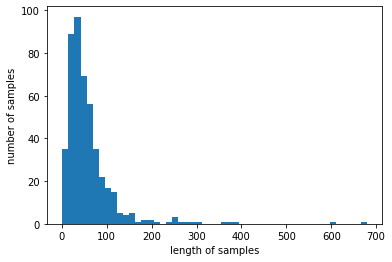

In [107]:
#패딩
print('댓글의 최대 길이 :',max(len(l) for l in X_train))
print('댓글의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [108]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [109]:
max_len = 400
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 400 이하인 샘플의 비율: 99.57264957264957


In [110]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [111]:
X_test.shape

(112, 400)

In [112]:
X_train.shape

(468, 400)

In [113]:
#LSTM으로 유투브 댓글 분류하기
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [114]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [43]:
#X_test = to_categorical(X_test, 3)

In [115]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

epochs = 5
batch_size = 64

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
7/7 [==============================] - 12s 1s/step - loss: 1.0978 - accuracy: 0.3493 - val_loss: 1.0952 - val_accuracy: 0.4149
Epoch 2/15
7/7 [==============================] - 7s 1s/step - loss: 1.0784 - accuracy: 0.5166 - val_loss: 1.0764 - val_accuracy: 0.4468
Epoch 3/15
7/7 [==============================] - 8s 1s/step - loss: 1.0135 - accuracy: 0.5264 - val_loss: 1.0540 - val_accuracy: 0.4255
Epoch 4/15
7/7 [==============================] - 7s 1s/step - loss: 0.9235 - accuracy: 0.5619 - val_loss: 0.9635 - val_accuracy: 0.5106
Epoch 5/15
7/7 [==============================] - 7s 1s/step - loss: 0.7481 - accuracy: 0.6585 - val_loss: 0.8096 - val_accuracy: 0.7128
Epoch 6/15
7/7 [==============================] - 7s 1s/step - loss: 0.4867 - accuracy: 0.9248 - val_loss: 0.7879 - val_accuracy: 0.6277
Epoch 7/15
7/7 [==============================] - 7s 1s/step - loss: 0.3280 - accuracy: 0.9721 - val_loss: 0.6375 - val_accuracy: 0.7447
Epoch 8/15
7/7 [========================

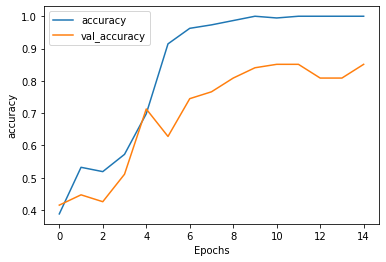

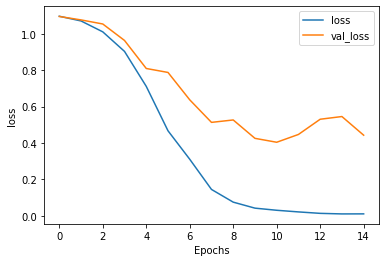

In [116]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


In [ ]:
#loaded_model = load_model('best_model.h5')
#print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

In [ ]:
#loaded_model.summary()

In [ ]:
#댓글의 카테고리를 예측하는 프로그램 만들기

In [117]:
def sentiment_predict(new_sentence):
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
 # print(pad_new)
  score = model.predict(pad_new) # 예측

 #if(score > 0.5):
  #  print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
 #else:
  #  print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))
  return score

In [118]:
##str(dataset.loc[[0],['comment_text']])

In [119]:
test_data

,title,view,like,unlike,comment,date,comment_text,뷰티,게임,운동,label
110,최애템으로 인생 데일리 메이크업 같이 준비해요 -Get Ready With Me |...,6605194,11000,3000,5280,2017.6.15,악 와 이거 진짜 리즈 말이 필요없다 지금 이거 보고 있는사람 눌러 또아언니가 다시...,1,0,0,0
419,가을에 하는 분위기 있는 핑크브라운 메이크업 pinkbrown makeup,640733,18000,184,852,2019.9.28,언니 언니가 예쁠 때마다 원씩 모았더니 일주일만에 강남 건물 채 샀어 언니 저희집 ...,1,0,0,0
565,[헬창의 삶 1화] 미친놈; 운동 중독 김계란씨,5123425,4000,1100,4295,2019.6.9,명대사 나왔다 봉무게 는 조상님이 들어주세요 제사 열심히 지내셨네소울테이컨가 와 밀...,0,0,1,2
77,배틀그라운드 VSS 암살 최강총으로 상향버프 꿀빨려면 지금뿐,414661,7100,115,1197,2021.4.21,진짜 지뢰 달걀을 몇 개 먹었는지 모르겠네 김푸른 그는 대체 블루형 상대 괴롭히는 ...,0,1,0,1
181,섀도우 꿀조합 새내기들이 하기에 좋은 올로드샵 데일리 눈화장 (겁나 쉬움 드루와),2040372,3000,373,501,2017.2.26,준비물 예쁜눈 아진짜 아이린 빼박 어떻게 사람 속눈썹이 언더까지 저렇게 길수가있죠 ...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
584,[뒷북 할로윈] 거꾸리 메이크업,4089243,4000,1100,3677,2019.11.1,언니 진짜 꾸준히 이상해주셔서 감사합니다 이 구역의 도라이 인정 앜 할로윈에 피만 ...,1,0,0,0
371,세계최초 99% 은신 임포스터 의 미친암살 레전드 우주하마 어몽어스,4597346,43000,1900,6890,2020.9.3,하마형 프사 무슨일이야 틀니하마 무엇그나저나 저그림 거울보면서 그린거지 진짜 잘생기...,0,1,0,1
399,피온4 여기서 좋은거 안 나오면 무과금 접는다고 했더니,97578,1400,31,277,2021.4.25,술마시지마 성주형 제발 오늘도 똑같다 그 루트 우리 토레스 잘가고 진짜 진짜 피파 ...,0,1,0,1
148,[eng/jp]성병검사를 받았습니다 검사결과와 처방받은 약에 대하여 STD Test...,691508,7200,127,645,2020.6.13,저는 대 후반 미혼여성인데 압구정동 유명한 여성외과에서 검사중 남자친구는 있으나 성...,0,0,1,2


In [120]:
test_data.iloc[0:1,6].values

array(['악 와 이거 진짜 리즈 말이 필요없다 지금 이거 보고 있는사람 눌러 또아언니가 다시 돌아왔으면 좋겠는사람 눌러 오늘 화장 진짜 역대급 인거 같아요 진짜 립도 잘 어울리고 머리색도 잘 어울리고 생얼도 그냥 미쳤어요 '],
      dtype=object)

In [121]:
sentiment_predict(test_data.iloc[0:1,6].values[0])

array([[0.03264442, 0.00476193, 0.9625937 ]], dtype=float32)

In [122]:
y_pred = model.predict(X_test)

In [123]:
y_pred_ = []
for i in range(len(y_pred)):
  arg = np.argmax(y_pred[i])
  y_pred_.append(arg)


In [124]:
y_pred[:3]

array([[3.2644410e-02, 4.7619268e-03, 9.6259367e-01],
       [9.9886250e-01, 4.3332161e-04, 7.0418394e-04],
       [5.9408832e-01, 7.5569391e-02, 3.3034232e-01]], dtype=float32)

In [125]:
y_pred_[:3]

[2, 0, 0]

In [126]:
y_train_ = []
for i in range(len(y_train)):
  arg = np.argmax(y_train[i])
  y_train_.append(arg)

In [127]:
y_train_[:3]

[2, 0, 1]

성능 테스트

In [128]:
from sklearn.metrics import classification_report

In [129]:
y_test_ = []
for i in range(len(y_test)):
  arg = np.argmax(y_test[i])
  y_test_.append(arg)

In [130]:
y_test[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [131]:
y_test_[:3]

[0, 0, 2]

In [132]:
print(classification_report(y_pred_,y_test_))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78        36
           1       0.65      0.81      0.72        32
           2       0.80      0.75      0.78        44

    accuracy                           0.76       112
   macro avg       0.76      0.76      0.76       112
weighted avg       0.77      0.76      0.76       112



비교대상 1 - RandomForest

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
rf_clf = RandomForestClassifier()

In [135]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [136]:
rf_pred = rf_clf.predict(X_test)

In [137]:
rf_pred_ = []
for i in range(len(rf_pred)):
  arg = np.argmax(rf_pred[i])
  rf_pred_.append(arg)

In [138]:
from sklearn.metrics import classification_report
print(classification_report(rf_pred_,y_test_))

              precision    recall  f1-score   support

           0       0.84      0.31      0.46        83
           1       0.33      0.72      0.45        18
           2       0.17      0.64      0.27        11

    accuracy                           0.41       112
   macro avg       0.44      0.56      0.39       112
weighted avg       0.69      0.41      0.44       112



비교대상 2 - 선형 분류

In [139]:
from sklearn.naive_bayes import GaussianNB

In [140]:

g_nb = GaussianNB()

In [141]:
g_nb.fit(X_train,y_train_)
g_nb_pred = g_nb.predict(X_test)

In [142]:
print(classification_report(g_nb_pred,y_test_))

              precision    recall  f1-score   support

           0       0.03      0.50      0.06         2
           1       1.00      0.39      0.56       102
           2       0.15      0.75      0.24         8

    accuracy                           0.42       112
   macro avg       0.39      0.55      0.29       112
weighted avg       0.92      0.42      0.53       112



In [143]:
sentiment -> case study로 
발표: 왜 연구를 했는가
데이터 수집 , 라벨링
데이터 분석 설명 : 카테고리별 frequen 단어, 단어별 특징, 단어 뽑기, 시각화
예측이 될 것이라 봤다
딮러닝을 가지고 학습
예측 이렇게했다 : LSTM , RNN, SVM, Randomforest, 
Svm 토큰화 한다음 word count vecterize 
logistic 생짜로 hyper 구하지 말고 


추가적으로: 뷰티 유투버가 먹방하는 것을 예측해봤다
우리 모델이 잘 맞출까?

영상 제목 분류
영상 댓글 분류
->영상의 제작자의 택스트 보다 영상을 보고 텍스트를 다는 사람들의 댓글에 영상에 대한 정보가 더 많을 것이다. 
->어플리케이션, 활용방법
ex) 우리모델을 사용하면 비디오 카테고라이션 자동화를 할때 비디오가 채널에 얽메이지않고 댓글을 보고 하는게 유의미가 있더라. 

** 왜 필요한가? 가장 중요하다. **문제 설정을 명확하게 하기
정확하게 설득을 해야한다. 이게 정말 필요하고, 우리가 꼭 해야했다. 

딥러닝을 활용한 유투브 영상 댓글 택스트 분석 통한 영상 카테고라이션 자동화

SyntaxError: ignored

In [ ]:
우리가 해야하는것

- class report 너가  - 오늘
- svm, logistic 동혁  -  금요일
- 각 카테고리별 단어 - 내가 금요일
- 시각화 - 분야 별 word cloud - 내가  금요일


- case study 
- 크롤링 ( 유투버 선정 후 운동 유투버 -> 게임 영상)
                                뷰티 -> 운동
                                게임 -> 운동
                                15개  
              카테고리 3개 600개 -> 뷰티 게임 운동 
              - 일요일까지 마치기 

게임 유투버 : 운동하는것 - 게임 


In [ ]:
sentiment_predict(str(dataset.loc[[30],['comment_text']]))

0.22230780124664307

In [ ]:
sentiment_predict(str(dataset.loc[[21],['comment_text']]))

0.9577650427818298

In [ ]:
sentiment_predict(str(dataset.loc[[2],['comment_text']]))

0.3401302099227905

In [ ]:
txt = str(dataset.loc[[2],['comment_text']])
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=500)
pred = model.predict(padded)
labels = [[1., 0., 0.], [0., 1., 0.],[0., 0., 1.]]
print(pred)
#print(pred, labels[np.argmax(pred)])